<a href="https://colab.research.google.com/github/softip/projeto_IA368X/blob/main/notebooks/E2_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

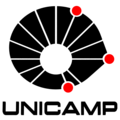
# Universidade Estadual de Campinas
---


### IA368/X - Ciência e Visualização de Dados em Saúde
##### E2: Análise Exploratória

# **Alunos**


1. Ana Carolina Furiozo Arantes
2. Ivan Paulino Pereira
3. Kleber Marcelo da Silva Rezende
4. Marilia Santoro Cardoso


# **Importação de bibliotecas e Leitura do Dataset**

In [46]:
import pandas as pd

#importa dataset do github
df = []
for i in range(1,10):
  df.append(pd.read_csv("https://raw.githubusercontent.com/softip/projeto_IA368X/main/data/external/dados_covid_ce_{}.csv".format(i)))

dfTotal = pd.DataFrame()
dfTotal = pd.concat(df)
dfTotal.reset_index()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35,36,37,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,24,25,26,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result

,index,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataColetaExame,dataResultadoExame,resultadoFinalExame,dataInicioSintomas,tipoTesteExame,racaCorPaciente,municipioNotificacaoEsus,profissionalSaude,cnesNotificacaoEsus,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,bairroPaciente,comorbidadeNeurologiaSivep,dataSolicitacaoExame,obitoConfirmado,dataObito,tipoObito,dataNotificacaoObito,comorbidadeCardiovascularSivep,comorbidadeObesidadeSivep,evolucaoCaso,dataEvolucaoCasoSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadePuerperaSivep,comorbidadePneumopatiaSivep,dataSaidaUtisSvep
0,0,579fce2867018c510bdfbc9c64c14a34,BRASIL,CE,230490.0,GROAIRAS,FEMININO,25.0,2020-01-01T03:00:00.000+0000,2021-01-08T03:00:00.000+0000,2021-01-08T03:00:00.000+0000,Negativo,2020-01-01T03:00:00.000+0000,Teste Rápido - Anticorpo,Parda,GROAIRAS,0.0,6565239,3.159248e+11,Não realizado.0,2020-06-18T03:00:00.000+0000,2020-06-18T03:00:00.000+0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,504dc6479d137aef7556a9878626aef8,NaN,CE,230240.0,BOA VIAGEM,MASCULINO,39.0,2020-01-01T03:00:00.000+0000,2020-10-20T03:00:00.000+0000,2020-10-20T03:00:00.000+0000,Positivo,2020-01-01T03:00:00.000+0000,Teste Rápido - Anticorpo,Parda,MARACANAU,0.0,NaN,NaN,NaN,NaN,NaN,ALTO DO MOTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9b1fca71df2ed7f6bcbc9f20122c78d2,BRASIL,CE,230075.0,AMONTADA,MASCULINO,66.0,2020-01-02T03:00:00.000+0000,2021-01-02T03:00:00.000+0000,2021-01-02T03:00:00.000+0000,Negativo,2020-01-02T03:00:00.000+0000,Teste Rápido - Anticorpo,Parda,AMONTADA,0.0,6460038,3.161099e+11,Negativo.0,2021-01-02T03:00:00.000+0000,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,fd948fcaca62c97a2f57a1717e7ad128,NaN,CE,230170.0,AURORA,MASCULINO,57.0,2020-01-02T03:00:00.000+0000,2020-01-02T03:00:00.000+0000,2020-01-02T03:00:00.000+0000,Positivo,2020-01-02T03:00:00.000+0000,Teste Rápido - Antígeno,Parda,PRINCESA ISABEL,0.0,NaN,NaN,NaN,NaN,NaN,AURORA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,fdccba56299c30f73a717ec52e5fc740,NaN,CE,231030.0,PARAMBU,FEMININO,25.0,2020-01-04T03:00:00.000+0000,2021-01-08T03:00:00.000+0000,2021-01-08T03:00:00.000+0000,Positivo,2020-01-01T03:00:00.000+0000,RT-PCR,Parda,PARAMBU,0.0,6362869,NaN,NaN,NaN,NaN,CAIXA D`AGUA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873578,167232,eefa5ea801b53366cce43b2b09a58bdf,NaN,CE,230440.0,FORTALEZA,FEMININO,3.0,2021-05-21T03:00:00.000+0000,NaN,NaN,NaN,2021-05-15T03:00:00.000+0000,NaN,Parda,FORTALEZA,0.0,407836,NaN,NaN,NaN,NaN,PICI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873579,167233,ab18e9b4902269f89d864e17da48e35f,NaN,CE,231290.0,SOBRAL,FEMININO,16.0,2021-05-19T03:00:00.000+0000,NaN,NaN,NaN,2021-05-17T03:00:00.000+0000,NaN,Parda,SOBRAL,1.0,2.42412e+06,NaN,NaN,NaN,NaN,PEDRINHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873580,167234,ad2979dd853f247793d4ec2fb967be3b,BRASIL,CE,230440.0,FORTALEZA,MASCULINO,43.0,2021-05-06T03:00:00.000+0000,2021-04-26T03:00:00.000+0000,2021-04-28T04:26:39.000+0000,Positivo,2021-05-04T03:00:00.000+0000,RT-PCR,Parda,FORTALEZA,0.0,7.99322e+06,3.162033e+11,Negativo.0,NaN,2021-05-06T03:00:00.000+0000,SIQUEIRA,NaN,2021-04-26T03:00:00.000+0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN
1873581,167235,114849ef4d40d96f060316c8be22abf3,NaN,CE,230370.0,CAUCAIA,MASCULINO,33.0,2021-05-09T03:00:00.000+0000,NaN,NaN,NaN,2021-05-07T03:00:0

In [48]:
#função para colocar os valores em cima das colunas
def anotarColunas(splot):
  for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')

#função para colocar os valores em cima das colunas
def anotarColunasPorcentagem(splot, top):
  top = 9 if top else -12 
  acumulado = 0
  for p in splot.patches:
    acumulado = acumulado + p.get_height()

  for p in splot.patches:
    valor_porcentagem = p.get_height() / acumulado * 100
    splot.annotate(format(valor_porcentagem, '.1f')+"%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, top), 
                   textcoords = 'offset points')

  

In [49]:
#Mostra as primeira linhas do dataset
dfTotal.head(5)

,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataColetaExame,dataResultadoExame,resultadoFinalExame,dataInicioSintomas,tipoTesteExame,racaCorPaciente,municipioNotificacaoEsus,profissionalSaude,cnesNotificacaoEsus,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,bairroPaciente,comorbidadeNeurologiaSivep,dataSolicitacaoExame,obitoConfirmado,dataObito,tipoObito,dataNotificacaoObito,comorbidadeCardiovascularSivep,comorbidadeObesidadeSivep,evolucaoCaso,dataEvolucaoCasoSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadePuerperaSivep,comorbidadePneumopatiaSivep,dataSaidaUtisSvep
0,579fce2867018c510bdfbc9c64c14a34,BRASIL,CE,230490.0,GROAIRAS,FEMININO,25.0,2020-01-01T03:00:00.000+0000,2021-01-08T03:00:00.000+0000,2021-01-08T03:00:00.000+0000,Negativo,2020-01-01T03:00:00.000+0000,Teste Rápido - Anticorpo,Parda,GROAIRAS,0.0,6565239,3.159248e+11,Não realizado.0,2020-06-18T03:00:00.000+0000,2020-06-18T03:00:00.000+0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,504dc6479d137aef7556a9878626aef8,NaN,CE,230240.0,BOA VIAGEM,MASCULINO,39.0,2020-01-01T03:00:00.000+0000,2020-10-20T03:00:00.000+0000,2020-10-20T03:00:00.000+0000,Positivo,2020-01-01T03:00:00.000+0000,Teste Rápido - Anticorpo,Parda,MARACANAU,0.0,NaN,NaN,NaN,NaN,NaN,ALTO DO MOTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9b1fca71df2ed7f6bcbc9f20122c78d2,BRASIL,CE,230075.0,AMONTADA,MASCULINO,66.0,2020-01-02T03:00:00.000+0000,2021-01-02T03:00:00.000+0000,2021-01-02T03:00:00.000+0000,Negativo,2020-01-02T03:00:00.000+0000,Teste Rápido - Anticorpo,Parda,AMONTADA,0.0,6460038,3.161099e+11,Negativo.0,2021-01-02T03:00:00.000+0000,NaN,NaN,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fd948fcaca62c97a2f57a1717e7ad128,NaN,CE,230170.0,AURORA,MASCULINO,57.0,2020-01-02T03:00:00.000+0000,2020-01-02T03:00:00.000+0000,2020-01-02T03:00:00.000+0000,Positivo,2020-01-02T03:00:00.000+0000,Teste Rápido - Antígeno,Parda,PRINCESA ISABEL,0.0,NaN,NaN,NaN,NaN,NaN,AURORA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fdccba56299c30f73a717ec52e5fc740,NaN,CE,231030.0,PARAMBU,FEMININO,25.0,2020-01-04T03:00:00.000+0000,2021-01-08T03:00:00.000+0000,2021-01-08T03:00:00.000+0000,Positivo,2020-01-01T03:00:00.000+0000,RT-PCR,Parda,PARAMBU,0.0,6362869,NaN,NaN,NaN,NaN,CAIXA D`AGUA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Análise de dados faltantes**

Existe muitos dados faltantes no dataset. A maior parte dos dados faltantes estão associados a data de entrada e saída da UTI, com cerca de 99% de dados faltantes. Entende-se que esses dados estão faltando, pois muitos pacientes não são internados, por desenvolverem um forma branda do doença.

Outro conjunto de dados que possui alto indice de falta, e que são alvos de estudo deste trabalho, são as comorbidades. Para aproximadamente 98% dos pacientes não foram registrados a presença ou a ausencia de comorbidades.

Em relação as comorbidades podemos levantar duas hipoteses para a ausência dos dados:

1. Paciente testados positivo para COVID, que não tiveram complicações e, portanto, não foram internados, não tiveram as informações sobre as possiveis comorbidades relatadas.
2. Pacientes com teste positivo para COVID que foram internados, não tiveram as comorbidades registradas, pois ele ou não possuia a comorbidade ou não relatou sua existência.


In [50]:
# Mostra a quantidade de dados faltantes
#mostra os registros faltantes por coluna
total_registros = len(dfTotal)
registros_faltante = dfTotal.isna().sum()
dfTotalFaltantes = result = pd.DataFrame({"Quantidade": registros_faltante})
dfTotalFaltantes = dfTotalFaltantes.assign(Porcentagem_dados_faltantes=dfTotalFaltantes/total_registros*100)
dfTotalFaltantes = dfTotalFaltantes.sort_values(by="Porcentagem_dados_faltantes", ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

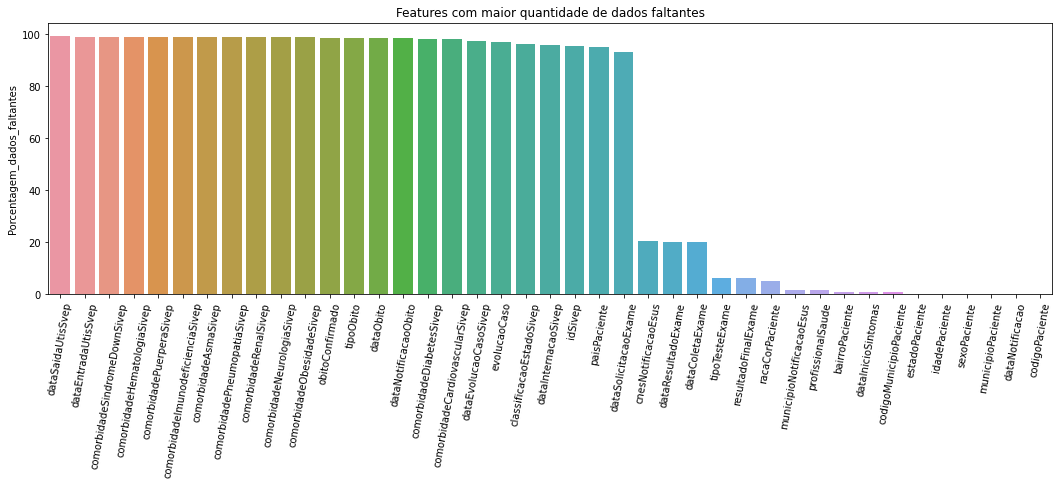

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(18,5))
sns.barplot(x=dfTotalFaltantes.index.to_list(), y="Porcentagem_dados_faltantes", data=dfTotalFaltantes).set_title("Features com maior quantidade de dados faltantes")
plt.xticks(rotation=80)

Cerca de 99% dos dados faltantes em relação as comorbidades são de pacientes que não foram internados, ao passo que 75% dos dados faltantes são de pessoas internadas. Além disso, as comorbidades mais comuns como Pressão Alta (Comborbidade Cardiovascular) e Diabetes possuem número menor de registros faltantes se comparada com as outras comorbidades.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

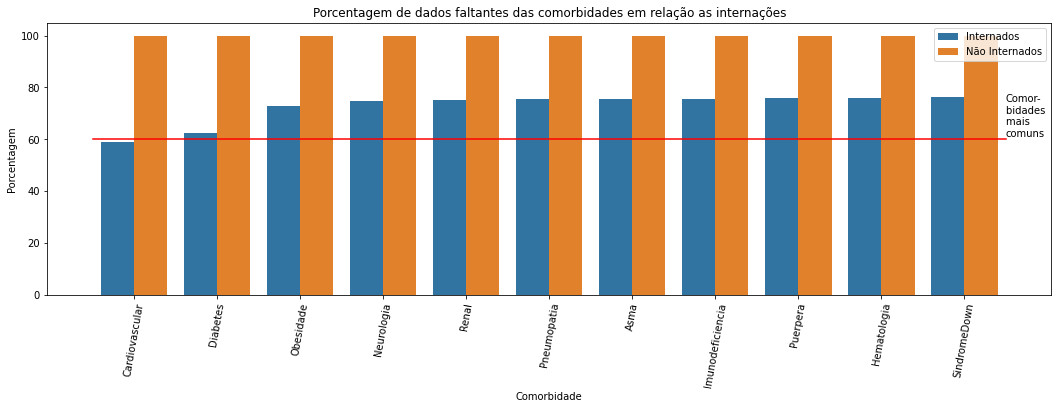

In [52]:
#dados faltantes para internados e não internados
dfPacienteInternados = dfTotal[(dfTotal["dataInternacaoSivep"].notna())]
dfPacienteNaoInternados = dfTotal[(dfTotal["dataInternacaoSivep"].isna())]

#Conta a quantidade de pacientes Internados
totalInternados = len(dfPacienteInternados)
#Conta a quantidade de pacientes não internados
totalNaoInternados = len(dfPacienteNaoInternados)

#Soma os registros os registros faltantes pelas categorias internados e não internados
registros_faltante_internados = dfPacienteInternados.isna().sum()
registros_faltante_nao_internados = dfPacienteNaoInternados.isna().sum()

#Cria um novo dataframe com todos os dados
dfTotalFaltantes =  pd.DataFrame({"Internados": registros_faltante_internados/totalInternados*100, 
                                  "Não Internados": registros_faltante_nao_internados/totalNaoInternados*100})

#filtra pelas colunas de comorbdade
dfTotalFaltantes = dfTotalFaltantes[dfTotalFaltantes.index.str.contains("comorbidade", na=False)]

#altera o indice do dataframe para comorbidade
dfTotalFaltantes.reset_index(inplace=True)
dfTotalFaltantes = dfTotalFaltantes.rename(columns = {'index':'Comorbidade'})

#Melhora a visualização dos nomes das comorbidades
def ajustaNome(x):
  x = x.replace("comorbidade", "")
  return x.replace("Sivep", "")
dfTotalFaltantes["Comorbidade"] = dfTotalFaltantes["Comorbidade"].apply(lambda x: ajustaNome(x))

# Trasforma as colunas Internados e Não Internados na coluna situação para gerar o gráfico 
dfTotalFaltantes = pd.melt(dfTotalFaltantes, id_vars="Comorbidade",  var_name="Situacao", value_name="Porcentagem", value_vars=["Internados", "Não Internados"])

#Classifica pelo número de dados menos faltantes
dfTotalFaltantes = dfTotalFaltantes.sort_values(by="Porcentagem", ascending=True)

# Imprime o Gráfico
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(18,5))
sns.barplot(x="Comorbidade", y="Porcentagem", hue="Situacao", data=dfTotalFaltantes).set_title("Porcentagem de dados faltantes das comorbidades em relação as internações")
sns.lineplot(x=[-0.5,10.5], y=[60,60], color='red')
plt.text(10.5, 61, "Comor-\nbidades \nmais \ncomuns")
plt.xticks(rotation=80)


## **Estudo sobre os obitos**

O coluna óbito confirmado do dataset apresenta que 21.963 paciente evoluiram para óbito, enquanto que apenas 735 não evoluiram para óbito, no entanto, essa coluna possui 1.850.885 registro faltantes, o leva a hipotese de que os registros faltantes sejam de pessoas que não faleceram.

Quanto ao tipo de óbito:
* 17.743 casos foram confirmados de Covid, 
* 4193 de síndorme respiratória aguda SRAG, 
* 1933 Descartados;
* 1018 estavam em investigação e 
* 27 foram confirmados pelo comitê.

In [53]:
# Imprime as informações sobre as colunas que possuem obito
#columns = [col for col in dfTotal.columns if 'obito' in col.lower()]
for col in ["obitoConfirmado", "tipoObito"]:
  print("----------", col,"---------------")
  print("Valores para a coluna:", dfTotal[col].unique())
  print("Contagem de valores")
  print(dfTotal[col].value_counts(dropna=False))
  print("")

---------- obitoConfirmado ---------------
Valores para a coluna: [nan  1.  0.]
Contagem de valores
NaN    1850885
1.0      21963
0.0        735
Name: obitoConfirmado, dtype: int64

---------- tipoObito ---------------
Valores para a coluna: [nan 'Confirmado' 'Descartado' 'Em investigação' 'SRAG Teste Rápido +'
 'Confirmado pelo comitê']
Contagem de valores
NaN                       1848669
Confirmado                  17743
SRAG Teste Rápido +          4193
Descartado                   1933
Em investigação              1018
Confirmado pelo comitê         27
Name: tipoObito, dtype: int64



No dataset existe 2951 casos de pacientes que possuem data de óbito registrada, mas os óbitos não foram contabilizados na coluna obitoConfirmado. Apenas os casos cujo tipo foram registrados como Covid, SRAG ou confirmados pelo Comitê estão registrados como obitoConfirmado.

Total de óbitos com data registrada, mas sem confirmação  2951
NaN    2216
0.0     735
Name: obitoConfirmado, dtype: int64
--------------------------


Text(0.5, 1.0, 'Óbitos não confirmados, mas com data registrada')

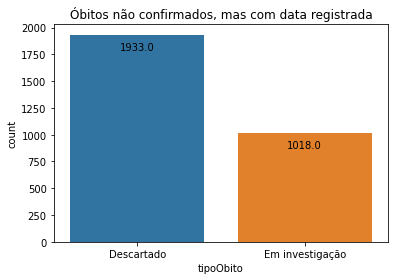

In [54]:
#verifica os paciente que possuem data de óbito registrada, mas que não possui óbito confirmado
df_confirmados_data = dfTotal[(dfTotal.dataObito.notna()) & (dfTotal.obitoConfirmado != 1)]
print("Total de óbitos com data registrada, mas sem confirmação ", len(df_confirmados_data))
print(df_confirmados_data["obitoConfirmado"].value_counts(dropna=False))
print("--------------------------")
splot = sns.countplot(x='tipoObito', data=df_confirmados_data)
anotarColunas(splot)
splot.set_title("Óbitos não confirmados, mas com data registrada")

In [55]:
#A coluna óbito confirmado apresenta apenas casos confirmados de Covid
df_Obitosconfirmados= dfTotal[(dfTotal.obitoConfirmado == 1)]
df_Obitosconfirmados.tipoObito.value_counts()

Confirmado                17743
SRAG Teste Rápido +        4193
Confirmado pelo comitê       27
Name: tipoObito, dtype: int64

In [56]:
#Não existes pacientes com óbito confirmado e com data do registro de óbito ausente.
df_naoconfirmados_data = dfTotal[(dfTotal.dataObito.isna()) & (dfTotal.obitoConfirmado == 1)]
print("Total de óbitos confirmados sem data registrada ", len(df_naoconfirmados_data))
print(df_naoconfirmados_data["obitoConfirmado"].value_counts(dropna=False))


Total de óbitos confirmados sem data registrada  0
Series([], Name: obitoConfirmado, dtype: int64)


In [11]:
#cria uma coluna no dataframe principal, informando se o paciente foi internado ou não
#dfTotal["Situação"] = dfTotal["dataInternacaoSivep"].apply(lambda x: "Internado" if pd.notnull(x) else "Não Internado")

**Pacientes que morreram por sexo**


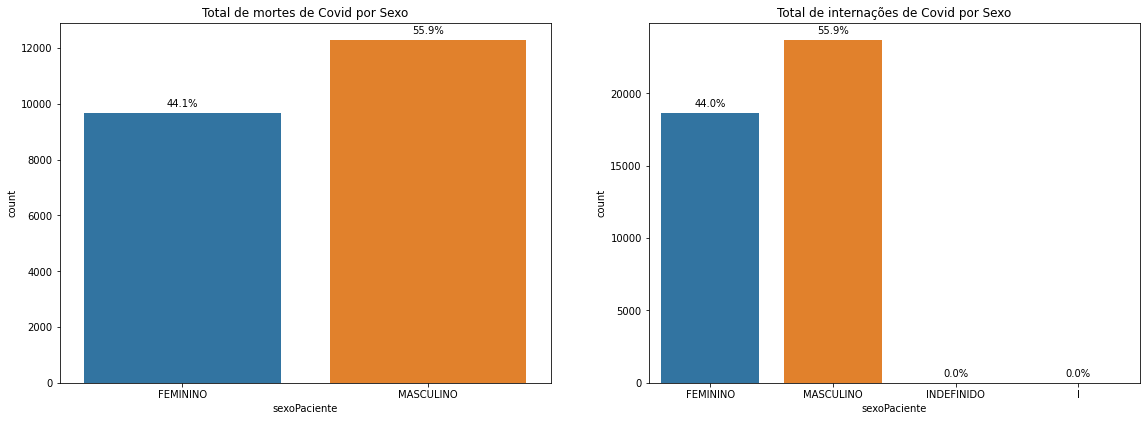

In [57]:
#Mostrando os pacientes que morreram de covid por sexo
fig, axes = plt.subplots(1,2,figsize=(15,5))
splot = sns.countplot(x="sexoPaciente",  data=dfTotal[dfTotal.obitoConfirmado == 1], ax=axes[0])
splot.set_title("Total de mortes de Covid por Sexo")
anotarColunasPorcentagem(splot, True)

#Total de Internações de covid por sexo
splot = sns.countplot(x="sexoPaciente",  data=dfTotal[dfTotal.dataInternacaoSivep.notna() & dfTotal.resultadoFinalExame.eq("Positivo")], ax=axes[1])
splot.set_title("Total de internações de Covid por Sexo")
anotarColunasPorcentagem(splot, True)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

**Pacientes que morreram por raça** A maioria dos paciente que faleceram por Covid são pardos. 


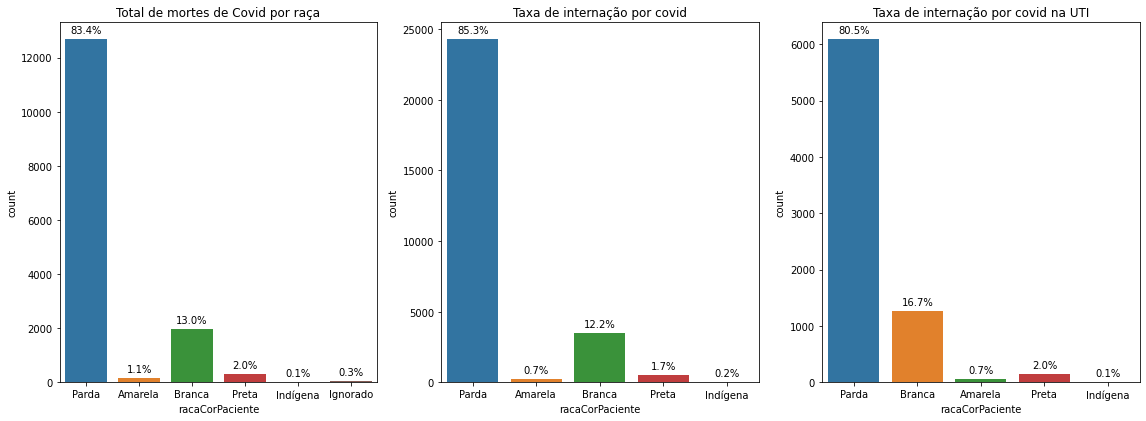

In [58]:
#Mostrando os pacientes que morreram de covid por raça
fig, axes = plt.subplots(1,3,figsize=(15,5))
splot = sns.countplot(x="racaCorPaciente",  data=dfTotal[dfTotal.obitoConfirmado == 1], ax=axes[0])
splot.set_title("Total de mortes de Covid por raça")
anotarColunasPorcentagem(splot, True)
#Taxa de internados por covid
splot = sns.countplot(x="racaCorPaciente",  data=dfTotal[dfTotal.dataInternacaoSivep.notna() & dfTotal.resultadoFinalExame.eq("Positivo")], ax=axes[1])
splot.set_title("Taxa de internação por covid")
anotarColunasPorcentagem(splot, True)
#Taxa de internados por covid  na uti
splot = sns.countplot(x="racaCorPaciente",  data=dfTotal[dfTotal.dataEntradaUtisSvep.notna() & dfTotal.resultadoFinalExame.eq("Positivo")], ax=axes[2])
splot.set_title("Taxa de internação por covid na UTI")
anotarColunasPorcentagem(splot, True)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

**Idade dos pacientes que morreram** Faixa etária entre 60 e 90 anos concentra a maior parte das mortes, aproximadamente 66%.


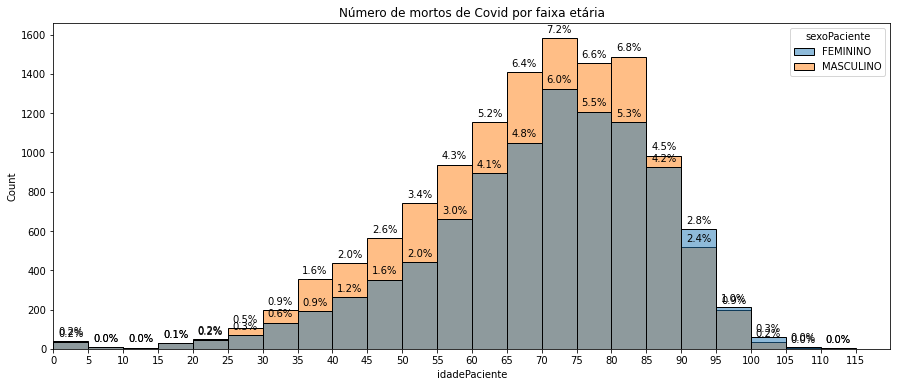

In [59]:
#Mostrando a faixa etária das mortes por Covid
fig = plt.figure(figsize=(15,6))
g = sns.histplot(x="idadePaciente", data=dfTotal[dfTotal.obitoConfirmado == 1], hue="sexoPaciente", bins=range(0,120,5))
g.set_xlim(0,120)
g.set_title("Número de mortos de Covid por faixa etária")
g.set_xticks(range(0,120,5))
anotarColunasPorcentagem(g, True)

**Dos casos positivos quantos foram internados**

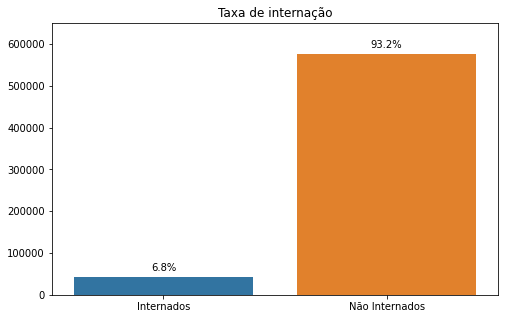

In [60]:
plt.figure(figsize=(8,5))
nInternados = dfTotal[dfTotal.resultadoFinalExame.eq("Positivo")]["dataInternacaoSivep"].notna().sum()
nNaoInternado = dfTotal[dfTotal.resultadoFinalExame.eq("Positivo")]["dataInternacaoSivep"].isna().sum()
g = sns.barplot(x=["Internados", "Não Internados"], y=[nInternados, nNaoInternado])
anotarColunasPorcentagem(g, True)
g.set_title("Taxa de internação")
plt.ylim(0, 650000)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

**Quantidade de comorbidades por obito**

Text(0.5, 1.0, 'Quantidade de comorbidades por Óbito')

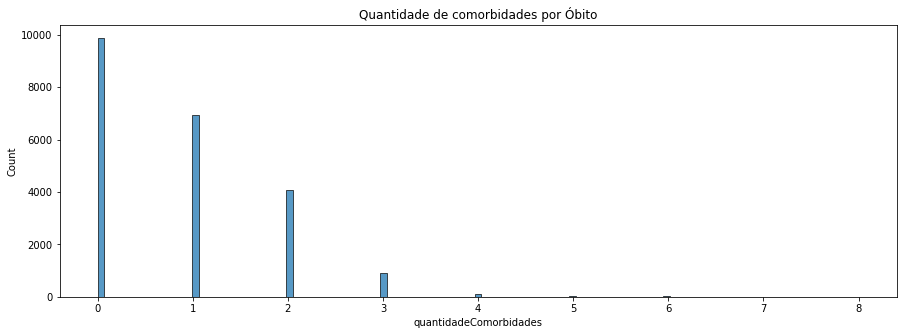

In [61]:
import numpy as np
#altera os tipos das comorbidades para númerico e transforma os valores nulos em não 
comorbidade_cols = [col for col in dfTotal.columns if 'comorbidade' in col]
for column in comorbidade_cols:
  dfTotal.loc[(dfTotal[column].eq("Não")), column] = 0
  dfTotal.loc[(dfTotal[column].eq("Sim")), column] = 1
  dfTotal.loc[(dfTotal[column].eq("Ignorado")), column] = np.nan

#soma a ocorrencia de comorbidades
dfTotal["quantidadeComorbidades"] = dfTotal[comorbidade_cols].sum(axis=1)

#imprime a quantidade de comorbidades em cada óbito
plt.figure(figsize=(15,5))
sns.histplot(x="quantidadeComorbidades", data=dfTotal[(dfTotal.obitoConfirmado ==  1)]).set_title("Quantidade de comorbidades por Óbito")

**Pessoas que morreram separados por comorbidades**

Text(0.5, 1.0, 'Mortes por comorbidades')

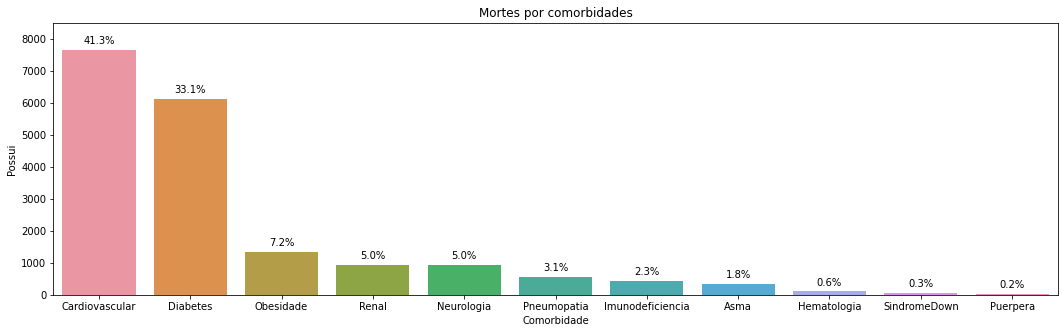

In [62]:
dfComorbidades = pd.melt(dfTotal[dfTotal.obitoConfirmado == 1], var_name="Comorbidade", value_name="Possui", value_vars=comorbidade_cols)
dfComorbidades = dfComorbidades[dfComorbidades.Possui == 1]
dfComorbidades["Comorbidade"] = dfComorbidades["Comorbidade"].apply(lambda x: ajustaNome(x))
dfComorbidades = dfComorbidades.groupby("Comorbidade").agg({"Possui": np.sum}).sort_values(by="Possui", ascending=False)
dfComorbidades.reset_index(inplace=True)
plt.figure(figsize=(18,5))
plt.ylim(0, 8500)
g = sns.barplot(x="Comorbidade", y="Possui", data=dfComorbidades)
anotarColunasPorcentagem(g, True)
g.set_title("Mortes por comorbidades")

**Taxa de obitos por infectados positivos**

Text(0.5, 1.0, 'Taxa de óbito por infectados')

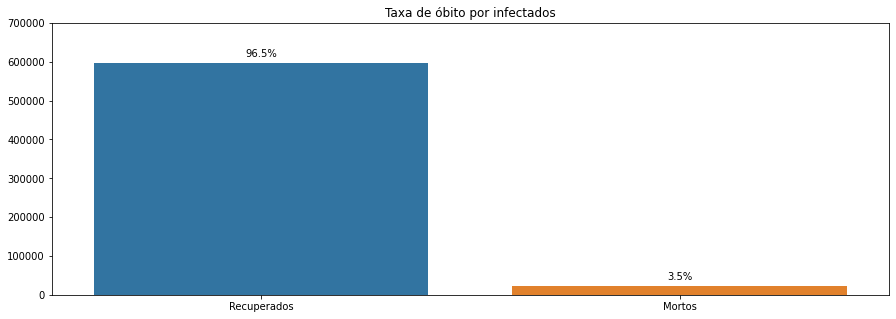

In [63]:
plt.figure(figsize=(15,5))
casos_positivo = dfTotal[(dfTotal.resultadoFinalExame.eq("Positivo"))].shape[0]
nMortes = dfTotal[(dfTotal.obitoConfirmado == 1)].shape[0]
g = sns.barplot(x=["Recuperados", "Mortos"], y=[casos_positivo-nMortes, nMortes])
anotarColunasPorcentagem(g, True)
plt.ylim(0, 700000)
g.set_title("Taxa de óbito por infectados")

**Taxa de morte por internação**

Text(0.5, 1.0, 'Taxa de morte por internação na UTI')

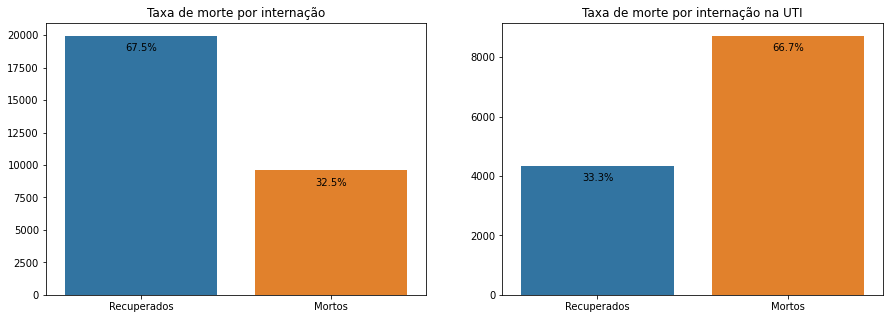

In [64]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
nInternados = dfTotal[(dfTotal.resultadoFinalExame.eq("Positivo")) & (dfTotal["dataInternacaoSivep"].notna()) & (dfTotal["dataEntradaUtisSvep"].isna())].shape[0]
nMortes = dfTotal[(dfTotal.obitoConfirmado == 1) & (dfTotal["dataInternacaoSivep"].notna()) & (dfTotal["obitoConfirmado"].notna()) & (dfTotal["dataEntradaUtisSvep"].isna())].shape[0]
g = sns.barplot(x=["Recuperados", "Mortos"], y=[nInternados-nMortes, nMortes], ax=axes[0])
anotarColunasPorcentagem(g, False)
g.set_title("Taxa de morte por internação")

nInternadosUti = dfTotal[(dfTotal.resultadoFinalExame.eq("Positivo")) & (dfTotal["dataEntradaUtisSvep"].notna())].shape[0]
nMortesUti = dfTotal[(dfTotal.obitoConfirmado == 1) & (dfTotal["dataEntradaUtisSvep"].notna())].shape[0]
g = sns.barplot(x=["Recuperados", "Mortos"], y=[nInternadosUti-nMortesUti, nMortesUti], ax=axes[1])
anotarColunasPorcentagem(g, False)
g.set_title("Taxa de morte por internação na UTI")


**Mortes por período**
O estado apresenta dois picos de mortes em maio de 2020 e março de 2021. Em maio apresenta alta queda no número de mortes, mais isso pode significar que os dados ainda não foram lançados ou disponibilizados.

In [ ]:
#seleciona todos os óbitos confirmados
dfSerieHistoriaObitos = dfTotal.loc[dfTotal.obitoConfirmado == 1, :]
#converte a data do óbito para datetime
dfSerieHistoriaObitos["data_obito"] = dfSerieHistoriaObitos["dataObito"].apply(pd.to_datetime) 
#conta os óbitos por data de ocorrência
dfSerieHistoriaObitos = dfSerieHistoriaObitos["data_obito"].value_counts()

Text(0.5, 1.0, 'Mortes por périodo')

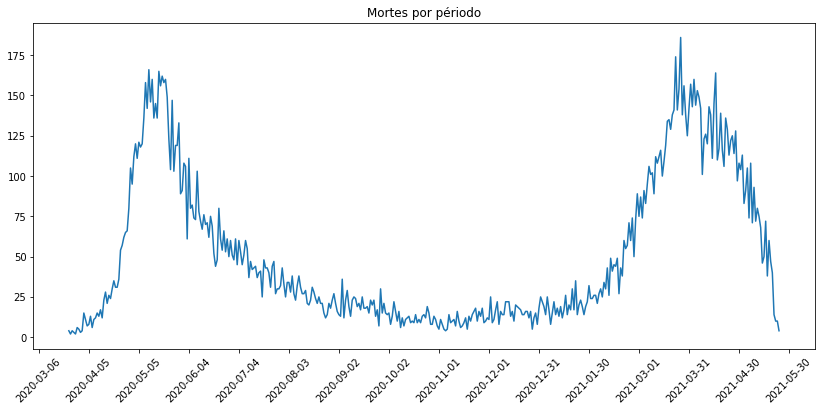

In [265]:
import matplotlib.ticker as ticker
#imprime o gráfico de pedidos por data
plt.figure(figsize=(14,6))
g = sns.lineplot(x=dfSerieHistoriaObitos.index, y=dfSerieHistoriaObitos.values)
plt.xticks(rotation=45)
#imprime de 30 em 30 dias
g.xaxis.set_major_locator(ticker.MultipleLocator(30))
g.set_title("Mortes por périodo")


**Cidades com maior número de mortos**

A cidade com maior número de óbitos é Fortaleza, seguida por Caucaia (16,3km) e Maracanaú (23,4km). Fortaleza é capital do Ceará, possui aeroporto e além disso é uma cidade turistica. Aproximidade de Caucaia e Maracanaú a Fortaleza pode ter contribuido para o elevado número de mortes.


In [219]:
#Faz a leitura do dataset contendo as latitudes dos municípios do IBGE
dfCoordenadas = pd.read_csv("https://raw.githubusercontent.com/softip/projeto_IA368X/main/data/external/IBGE.csv")
#remove o último digito da coluna código do Ibge, para ficar igual ao dataset da covid
dfCoordenadas['codigo_ibge_6d'] = dfCoordenadas['codigo_ibge'].astype(str).str[:-1].astype(np.int64)
#Junta os dois datasets: Casos Covid = Coordenadas
dfTotalCoordenadas = pd.merge(dfTotal, dfCoordenadas, how="inner", left_on="codigoMunicipioPaciente", right_on="codigo_ibge_6d")
#seleciona as colunas latitude e longitude e codigo_ibge filtrando apenas os pacientes que morreram por covid
dfMortesMunicipio = dfTotalCoordenadas.loc[(dfTotalCoordenadas.obitoConfirmado == 1), ["latitude", "longitude", "codigo_ibge_6d", "nome"]]
#Faz a contagem de quantos mortes ocorreu por municipio
dfMortesCoordenadasMunicipio = dfMortesMunicipio.groupby(["latitude", "longitude", "nome"]).agg(total_mortes=("codigo_ibge_6d", "count"))
dfMortesCoordenadasMunicipio.reset_index(inplace=True)
#obtém as coordenadas da região com maior número de mortes para centralizar o mapa
dfCoordenadasMaiorFoco = dfMortes123[dfMortes123.total_mortes == dfMortes123.total_mortes.max()]
dfMortesCoordenadas = dfMortesCoordenadasMunicipio.loc[:, ["latitude", "longitude", "total_mortes"]]


In [220]:
# 10 cidades com maior número de mortes
dfMortesCoordenadasMunicipio.sort_values(by="total_mortes", ascending=False).head(10)

,latitude,longitude,nome,total_mortes
149,-3.71664,-38.5423,Fortaleza,9486
148,-3.72797,-38.6619,Caucaia,787
141,-3.86699,-38.6259,Maracanaú,741
150,-3.68913,-40.3482,Sobral,617
13,-7.19621,-39.3076,Juazeiro do Norte,501
163,-3.49933,-39.5836,Itapipoca,257
140,-3.89143,-38.6829,Maranguape,251
11,-7.21530,-39.4103,Crato,220
131,-3.97840,-38.6183,Pacatuba,214
67,-5.19067,-39.2889,Quixeramobim,212


In [221]:
# Import the folium library.
import folium
from folium.plugins import HeatMap
#Desenha o mapa de calor em relação as regiões com maior número de mortes
baseMap = folium.Map(width="100%", height="100%", location=[dfCoordenadasMaiorFoco.iloc[0]["latitude"],dfCoordenadasMaiorFoco.iloc[0]["longitude"]], zoom_start=7)
baseMap = baseMap.add_child(HeatMap(dfMortesCoordenadas.values))
#adiciona informações ao mapa
for i in range(0, len(dfMortesCoordenadasMunicipio)):
  folium.Circle(
      location=[dfMortesCoordenadasMunicipio.iloc[i]["latitude"], dfMortesCoordenadasMunicipio.iloc[i]["longitude"]], 
      color = "#00FF69", 
      fill="#00A1B3",
      tooltip='<li><strong>Cidade: </strong>'+str(dfMortesCoordenadasMunicipio.iloc[i]["nome"])+'</li>'+
              '<li><strong>Mortes: </strong>'+str(dfMortesCoordenadasMunicipio.iloc[i]["total_mortes"])+'</li>',
      radius = (dfMortesCoordenadasMunicipio.iloc[i]["total_mortes"]**1.0)).add_to(baseMap)
baseMap

**Correlação entre Tipo de óbito e comorbidades**

Não identificamos correlação das comorbidades entre os óbitos, sejam eles causados por Covid ou não.

In [102]:
#seleciona apenas as features que possuem comorbidades
comorbidade_cols = [col for col in dfTotal.columns if 'comorbidade' in col]
#apaga do dataset  os registros que não tem todas as informações preenchidas sobre as comorbidades
dfLimpo = dfTotal.dropna(subset=comorbidade_cols)
#cria uma lista com outras caracteristicas para interessantes para avaliar a correção
other_features = ["obitoConfirmado", "idadePaciente", "racaCorPaciente", "sexoPaciente", "codigoMunicipioPaciente"]
other_features = other_features + comorbidade_cols
#Seleciona do dataset apenas os pacientes que faleceram por covid
df = dfLimpo.loc[(dfLimpo["dataNotificacaoObito"].notna()), other_features]
#Altera o tipo das columnas comorbidades para númerico
df[comorbidade_cols] = df[comorbidade_cols].apply(pd.to_numeric)

In [184]:
#transforma tipo sexo em númerico
df["sexo"] = df["sexoPaciente"].apply(lambda x: 0 if x == "INDEFINIDO" else 1 if x == "MASCULINO" else 2)
#tranforma raca em númerico: 0) Indefinido; 1) Parda; 2) Branca; 3) Preta, 4) Amarela, 5) Indgena
df["raca"] = df["racaCorPaciente"].apply(lambda x: 0 if x == np.nan else 1 if x == "Parda" else 2 if x == "Branca" else 3 if x == "Preta" else 4 if x == "Amarela" else 5)


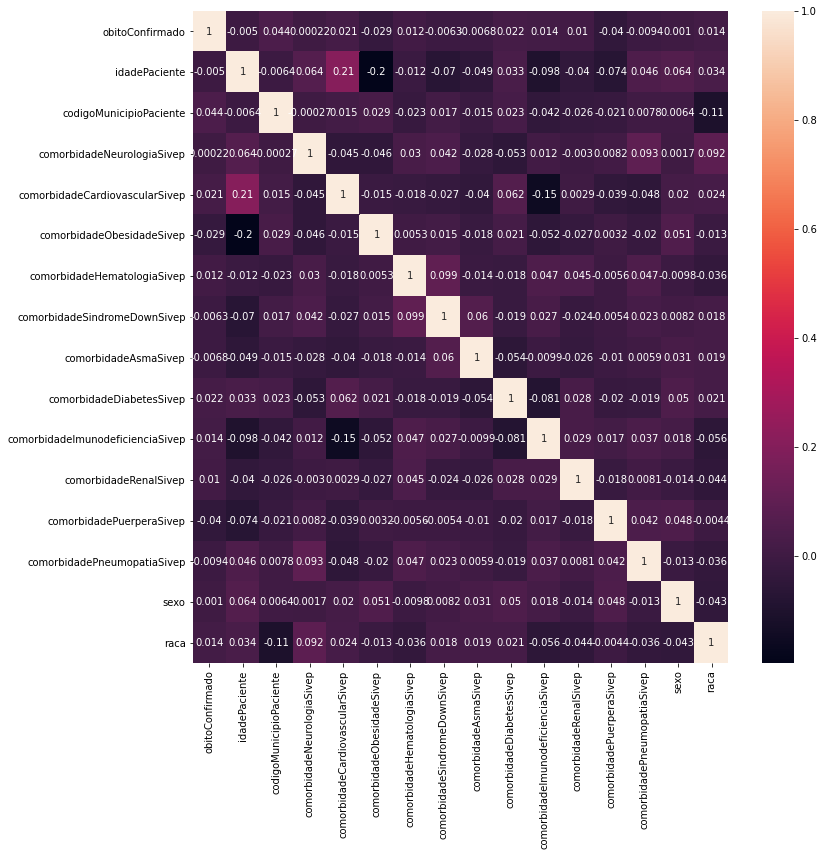

In [105]:
#faz a correlação entre as features e apresenta o Mapa de calor
cor2 = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
sns.heatmap(cor2, annot=True)